In [2]:
from sklearn.cross_decomposition import PLSRegression
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def print_pairplot(array, 
                   LIST_DIM_PAIR_PLOT=[0,1,2], 
                   indice_color=None,
                   marker = ',',
                   s = 1,
                   cmap = 'jet', 
                   best_points = None, 
                   col_best = 'forest_green',
                   worst_points = None,
                   col_worst = 'crimson',
                   alpha = None,
                   indice = None
                   ):
    nb_dim = len(LIST_DIM_PAIR_PLOT)
    fig, axes = plt.subplots(nb_dim, nb_dim, 
                            figsize=(5*nb_dim, 5*nb_dim))
    ax_list = axes.ravel()

    if indice_color is None:
        indice_color = np.zeros(len(array))

    for i, a in enumerate(LIST_DIM_PAIR_PLOT):
        for j in range(i+1):
            o = LIST_DIM_PAIR_PLOT[j]
            plt.subplot(nb_dim, nb_dim, nb_dim*i+j+1)
            if best_points is None : 
                plt.scatter(array[:,a], array[:,o], s=s, marker = marker, c= indice_color, cmap = cmap)
            if best_points is not None : 
                plt.scatter(array[:,a], array[:,o], s=s, marker = marker, c= 'grey', alpha = alpha)
                plt.scatter(best_points[:,a], best_points[:,o], s=20, marker = '*',  color = col_best, label = 'best points from test')
                plt.scatter(worst_points[:,a], worst_points[:,o], s=20, marker = '*',  color = col_worst, label = 'worst points from test')
            plt.xlabel(f"dim {a}")
            plt.ylabel(f"dim {o}")

    if indice is not None : 
        plt.colorbar(ax=axes,  shrink = 0.6)
        name_indice = indice.__name__
        plt.suptitle(f"color according to {name_indice}", 
                    verticalalignment = 'bottom', 
                    size = 'xx-large')
        

    for i in range(nb_dim):
        for j in range(i+1,nb_dim):
            plt.subplot(nb_dim, nb_dim, nb_dim*i+j+1)
            plt.axis('off')



In [4]:
N = 500
mu = np.zeros(10)
cov = np.eye(10)


def f2(x):
    return x[0]+x[1]


def f3(x):
    return 4*x[0]+2*x[1]


nuage_x = np.random.multivariate_normal(mu, cov, size = N)
attrib_pts = nuage_x[:,1]+ nuage_x[:,2]  + nuage_x[:,3]+ .5* np.random.normal(size=N)



In [5]:
np_comp_pls = 3

pls = PLSRegression(n_components=np_comp_pls)

### TODO: fit the model
pls.fit(nuage_x, attrib_pts)


PLSRegression(n_components=3)

In [6]:
pls.y_scores_.shape

(500, 3)

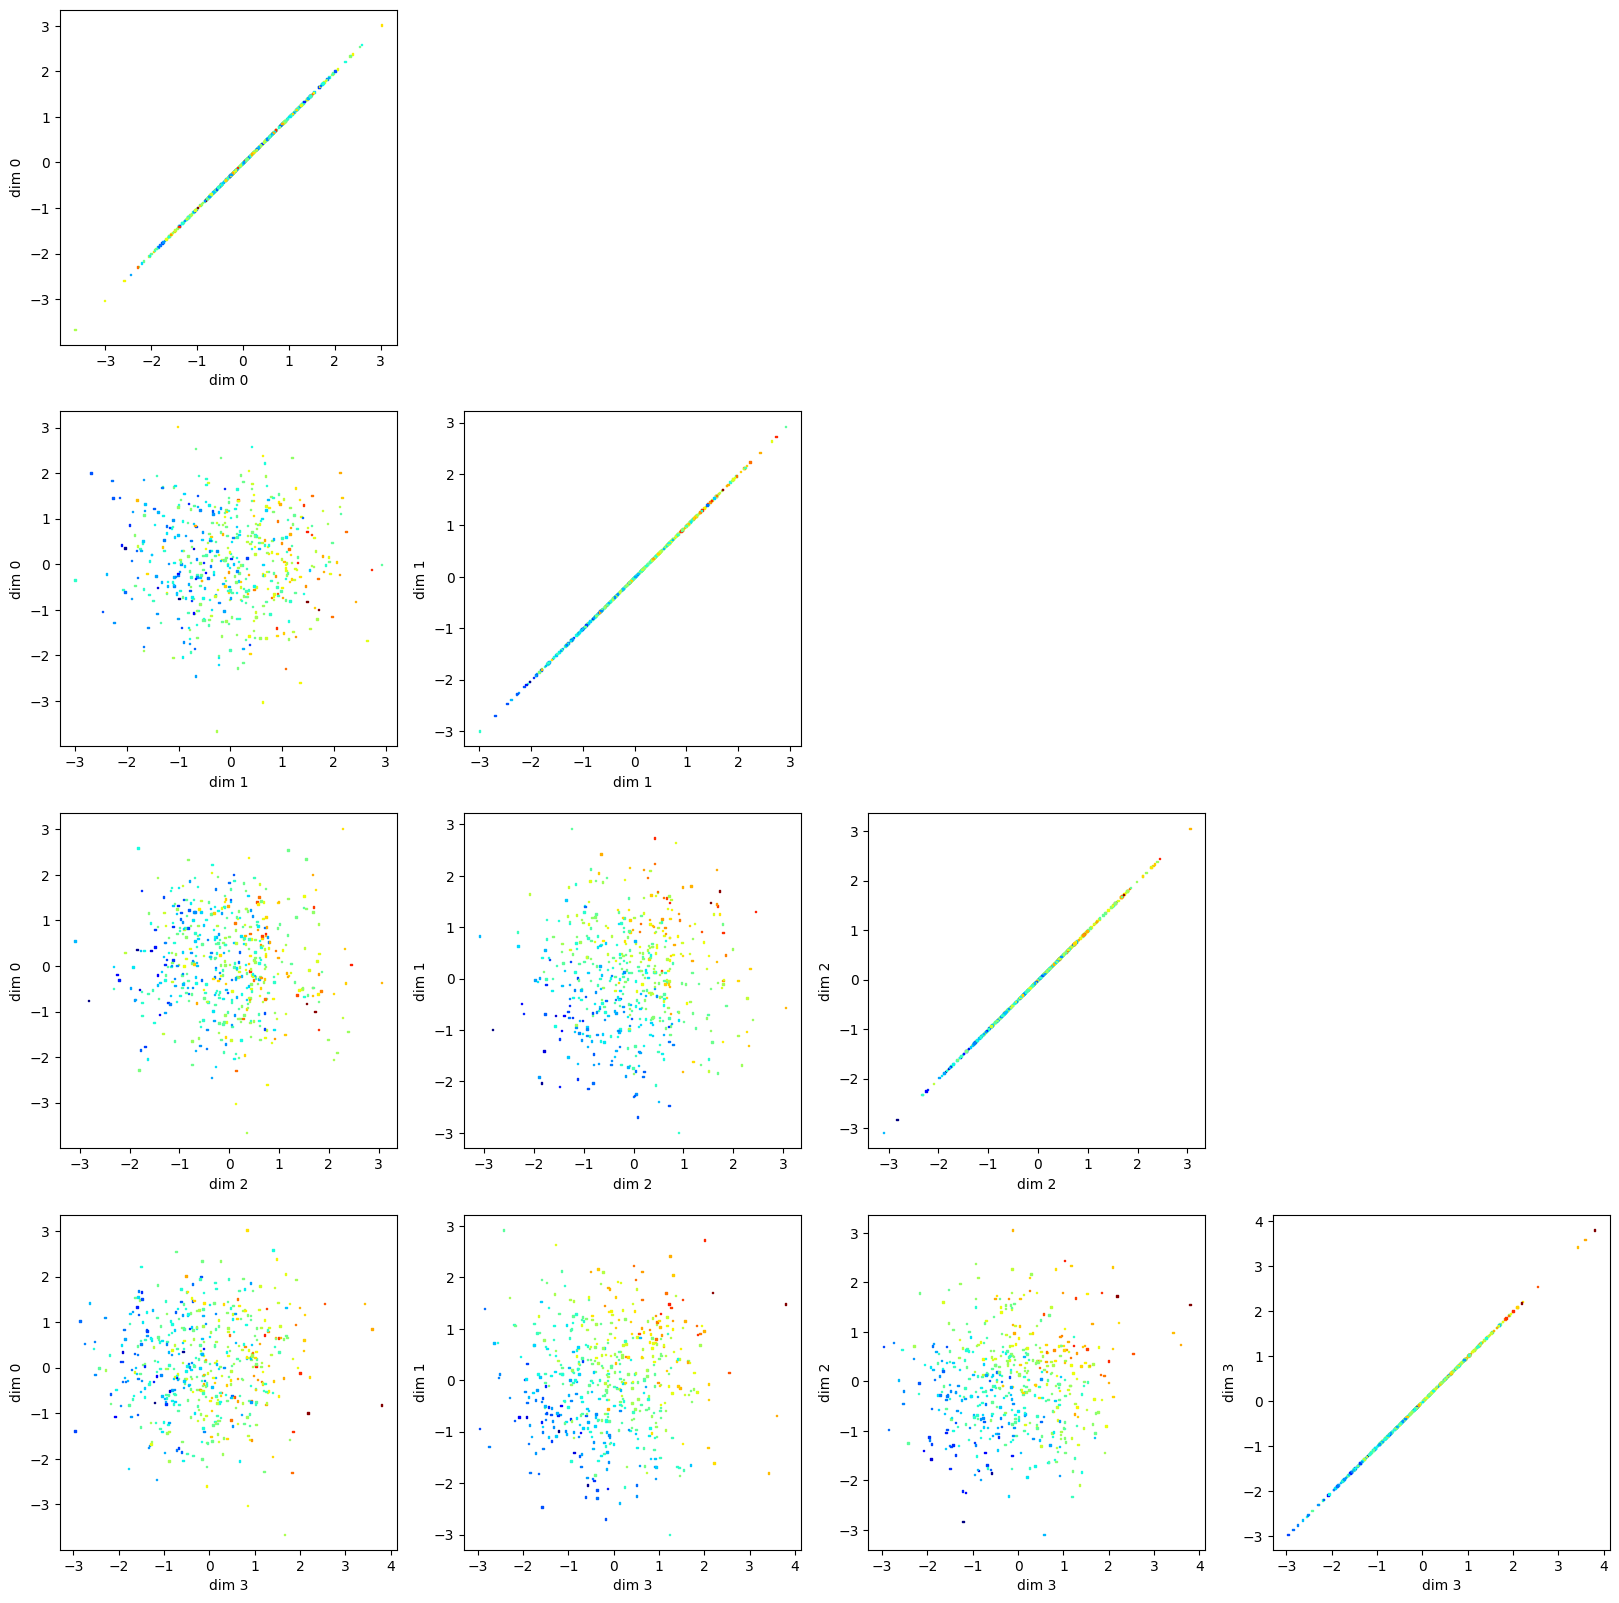

In [7]:
LIST_DIM_PAIR_PLOT = [0, 1, 2, 3]

print_pairplot(nuage_x, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

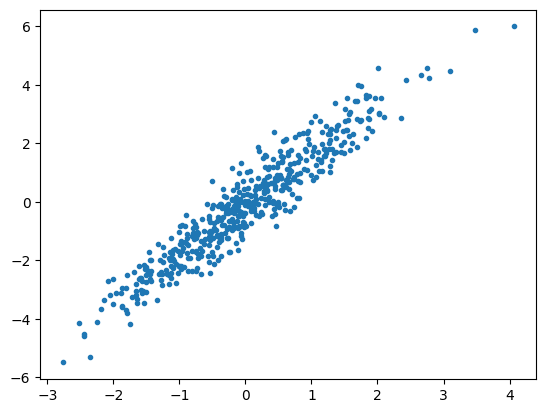

In [8]:
plt.plot(pls.x_scores_[:,0], attrib_pts, '.')

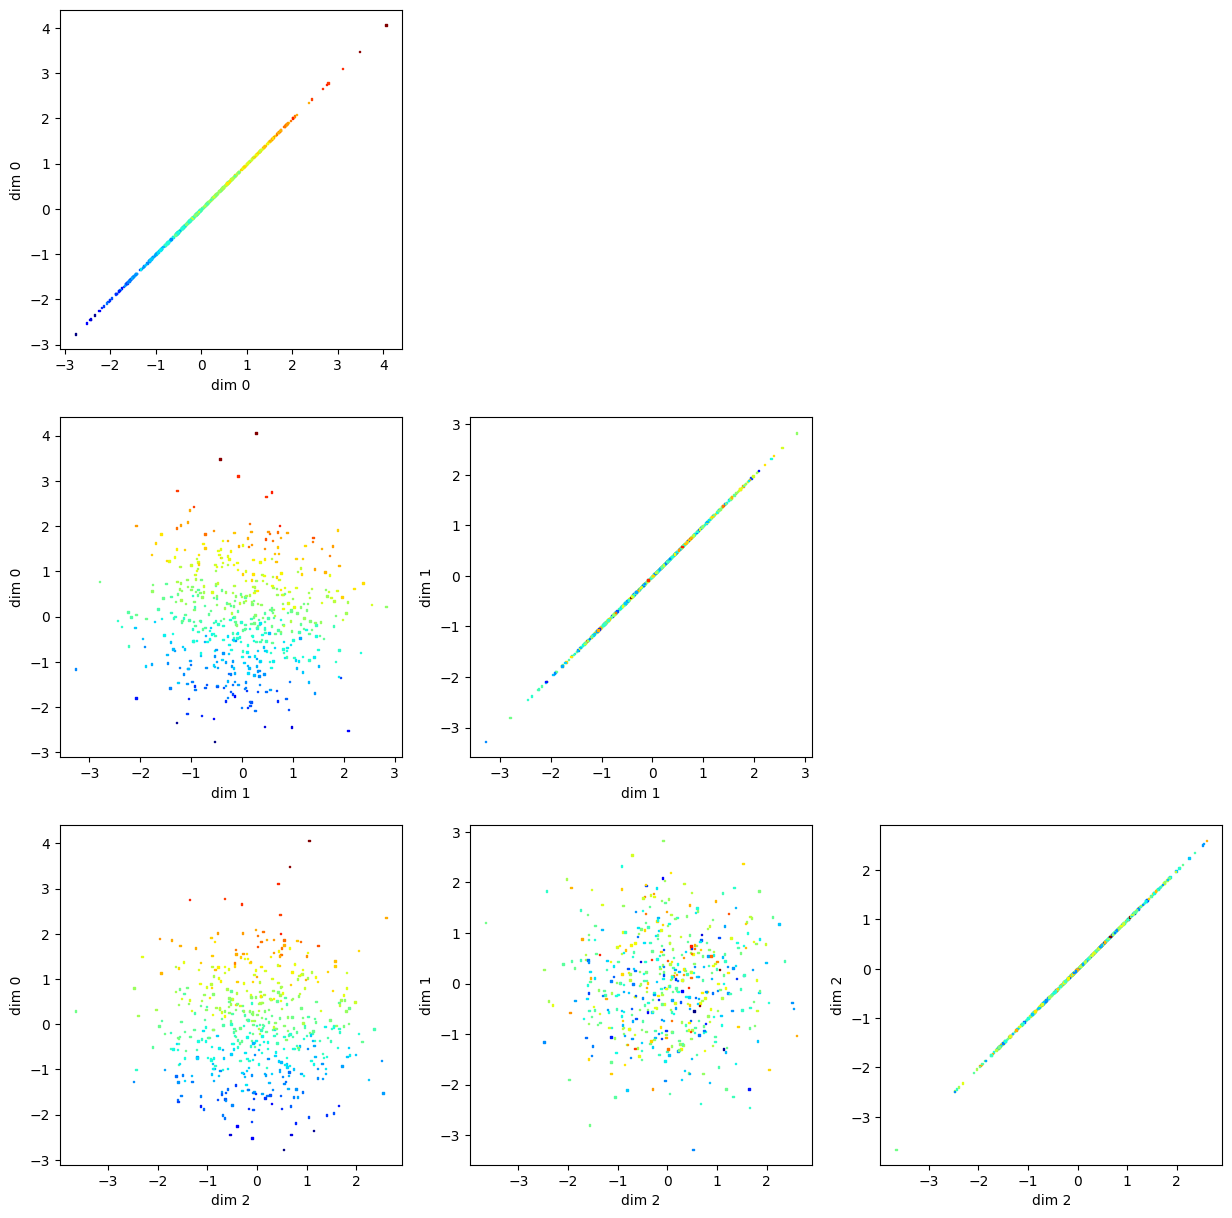

In [9]:
LIST_DIM_PAIR_PLOT = [0,1, 2]

print_pairplot(pls.x_scores_, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

### attrib non lin

In [10]:
N = 500
mu = np.zeros(10)
cov = np.eye(10)

def f(x):
    return x[0]**2 - x[1]**3  #+ x[2]**2

def f2(x):
    return x[0]+x[1]


def f3(x):
    return 4*x[0]+2*x[1]


nuage_x = .5*np.random.multivariate_normal(mu, cov, size = N)
attrib_pts = np.array([f(x) for x in nuage_x]) + .1* np.random.normal(size=N)



In [11]:
np_comp_pls = 3

pls = PLSRegression(n_components=np_comp_pls)

### TODO: fit the model
pls.fit(nuage_x, attrib_pts)


PLSRegression(n_components=3)

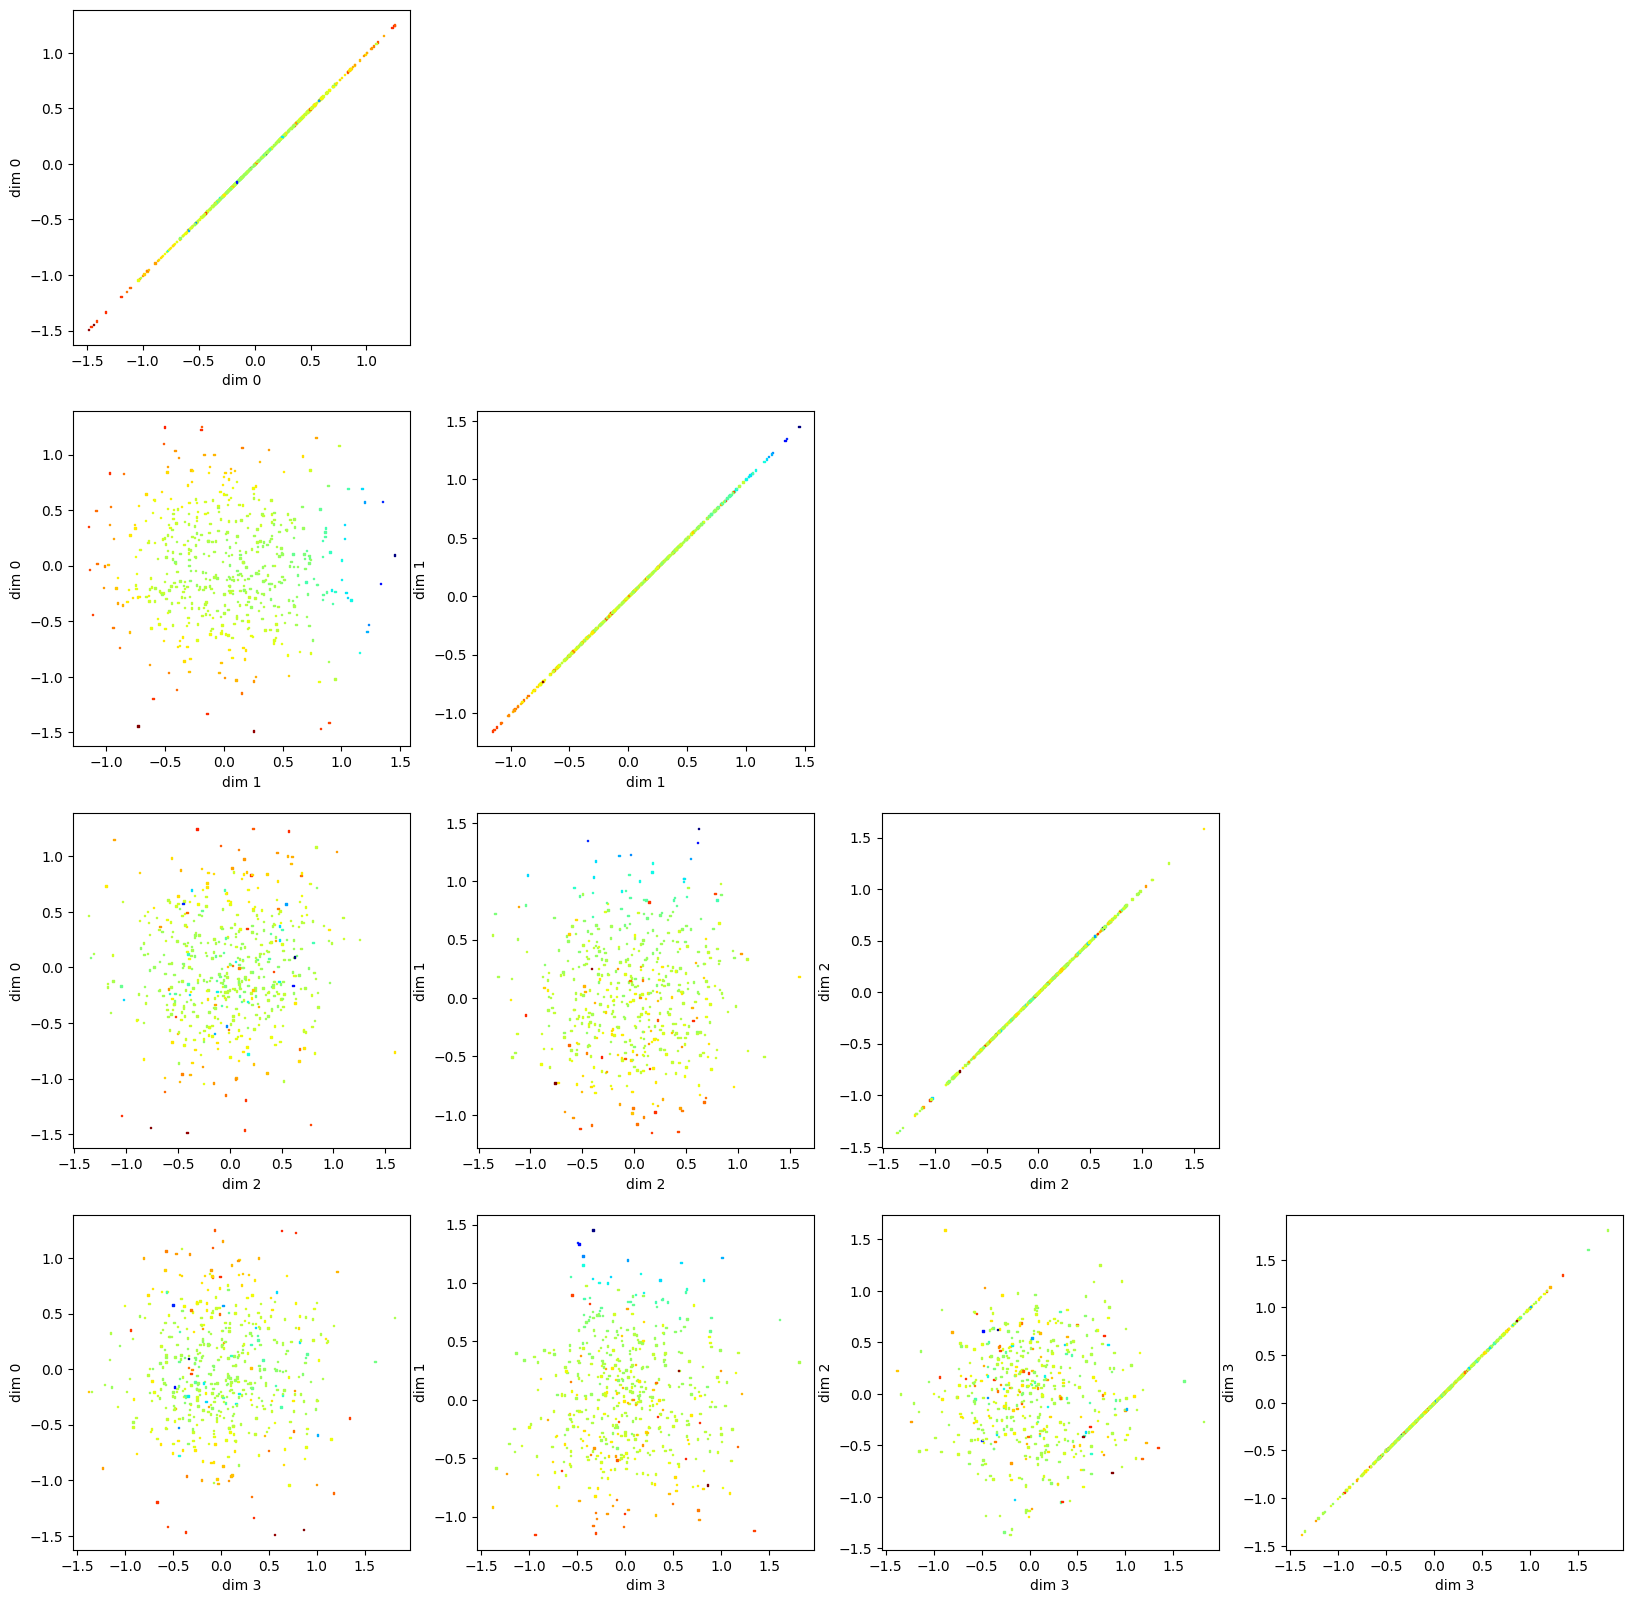

In [12]:
LIST_DIM_PAIR_PLOT = [0, 1, 2, 3]

print_pairplot(nuage_x, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

In [13]:
PLSRegression?

Init signature:
PLSRegression(
    n_components=2,
    *,
    scale=True,
    max_iter=500,
    tol=1e-06,
    copy=True,
)
Docstring:     
PLS regression.

PLSRegression is also known as PLS2 or PLS1, depending on the number of
targets.

Read more in the :ref:`User Guide <cross_decomposition>`.

.. versionadded:: 0.8

Parameters
----------
n_components : int, default=2
    Number of components to keep. Should be in `[1, min(n_samples,
    n_features, n_targets)]`.

scale : bool, default=True
    Whether to scale `X` and `Y`.

max_iter : int, default=500
    The maximum number of iterations of the power method when
    `algorithm='nipals'`. Ignored otherwise.

tol : float, default=1e-06
    The tolerance used as convergence criteria in the power method: the
    algorithm stops whenever the squared norm of `u_i - u_{i-1}` is less
    than `tol`, where `u` corresponds to the left singular vector.

copy : bool, default=True
    Whether to copy `X` and `Y` in :term:`fit` before applying ce

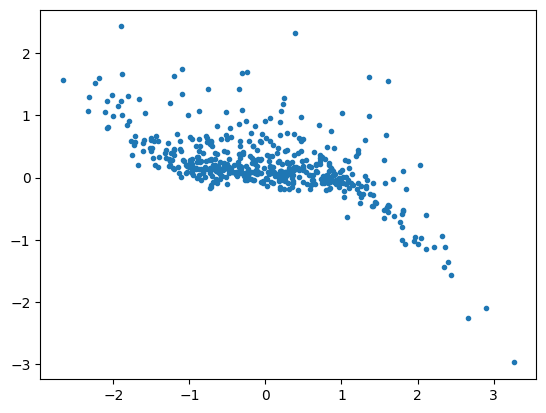

In [14]:
plt.plot(pls.x_scores_[:,0], attrib_pts, '.')

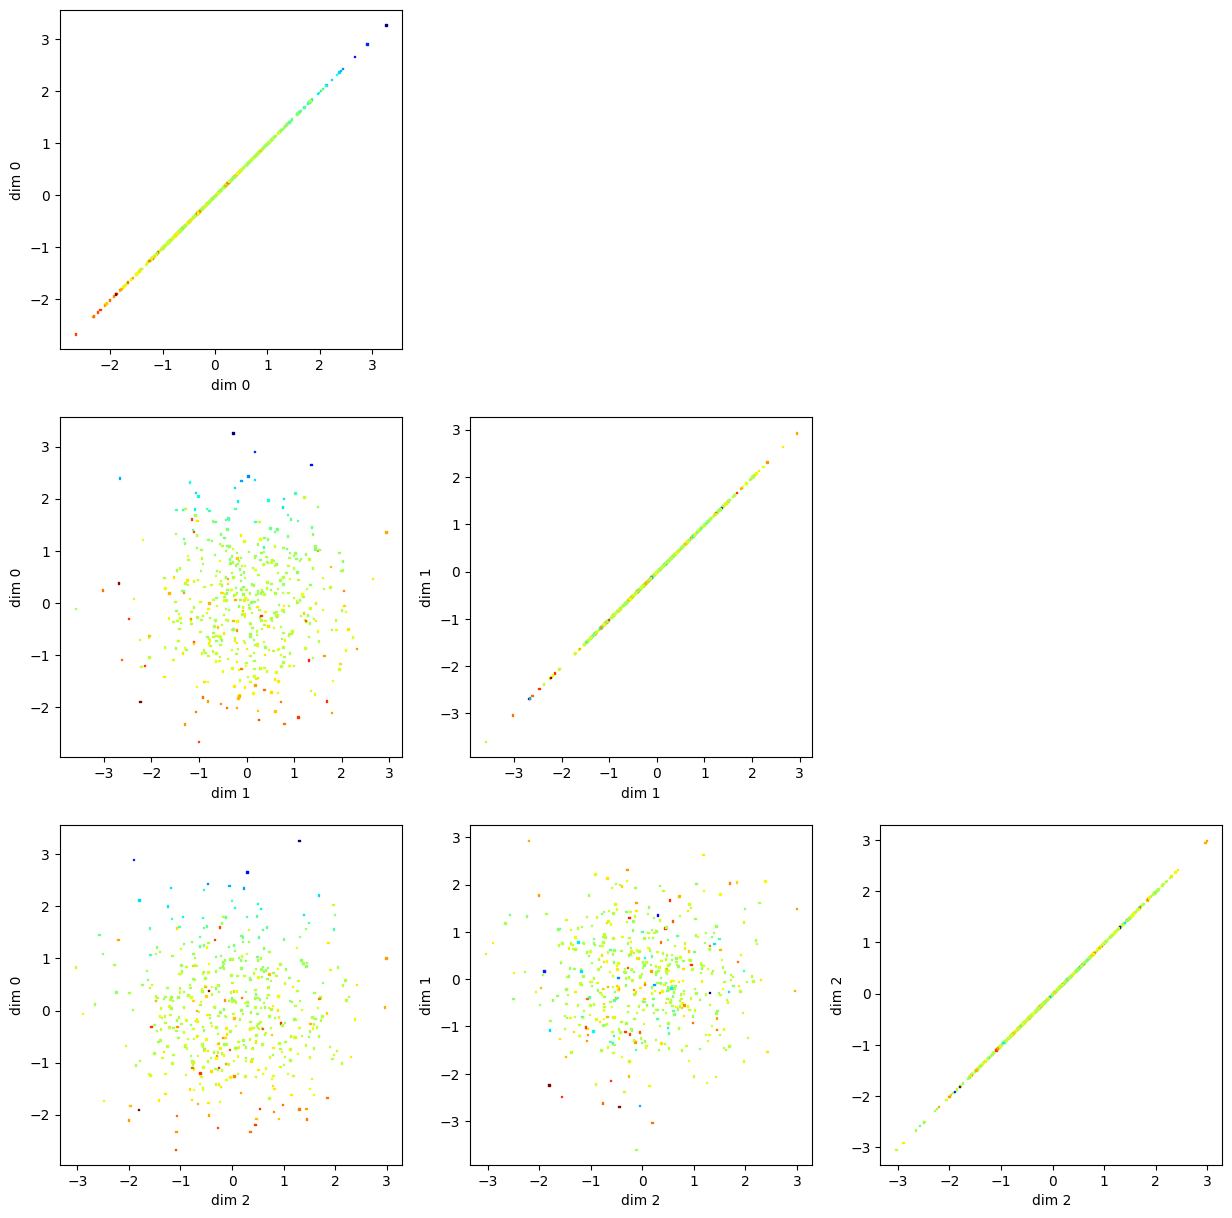

In [15]:
LIST_DIM_PAIR_PLOT = [0, 1, 2]

print_pairplot(pls.x_scores_, LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)

## OPLS

In [16]:
def opls(X, y, n_pred=1, n_ortho=1):
    X = X - X.mean(axis=0)  # Centrage des données
    y = y - y.mean()        # Centrage de y
    
    T_pred, P_pred = [], []  # Stocke les composantes prédictives
    T_ortho, P_ortho = [], []  # Stocke les composantes orthogonales

    for _ in range(n_pred):
        # Étape 1 : Calcul du vecteur de poids prédictif
        w = X.T @ y
        w /= np.linalg.norm(w)
        
        # Étape 2 : Calcul du score prédictif
        t = X @ w
        p = (X.T @ t) / (t.T @ t)  # Loadings prédictifs
        
        # Stocker les composantes
        T_pred.append(t)
        P_pred.append(p)
        
        # Soustraction de la variance prédictive
        X -= np.outer(t, p)
    
    for _ in range(n_ortho):
        # Étape 3 : Calcul de la variance orthogonale
        w_ortho = X.T @ (X @ w)
        w_ortho /= np.linalg.norm(w_ortho)
        
        # Étape 4 : Calcul du score orthogonal
        t_ortho = X @ w_ortho
        p_ortho = (X.T @ t_ortho) / (t_ortho.T @ t_ortho)
        
        # Stocker les composantes
        T_ortho.append(t_ortho)
        P_ortho.append(p_ortho)
        
        # Soustraction de la variance orthogonale
        X -= np.outer(t_ortho, p_ortho)

    return np.array(T_pred), np.array(P_pred), np.array(T_ortho), np.array(P_ortho)


In [17]:
Z ,_,_,_= opls(nuage_x, attrib_pts, n_pred=3)

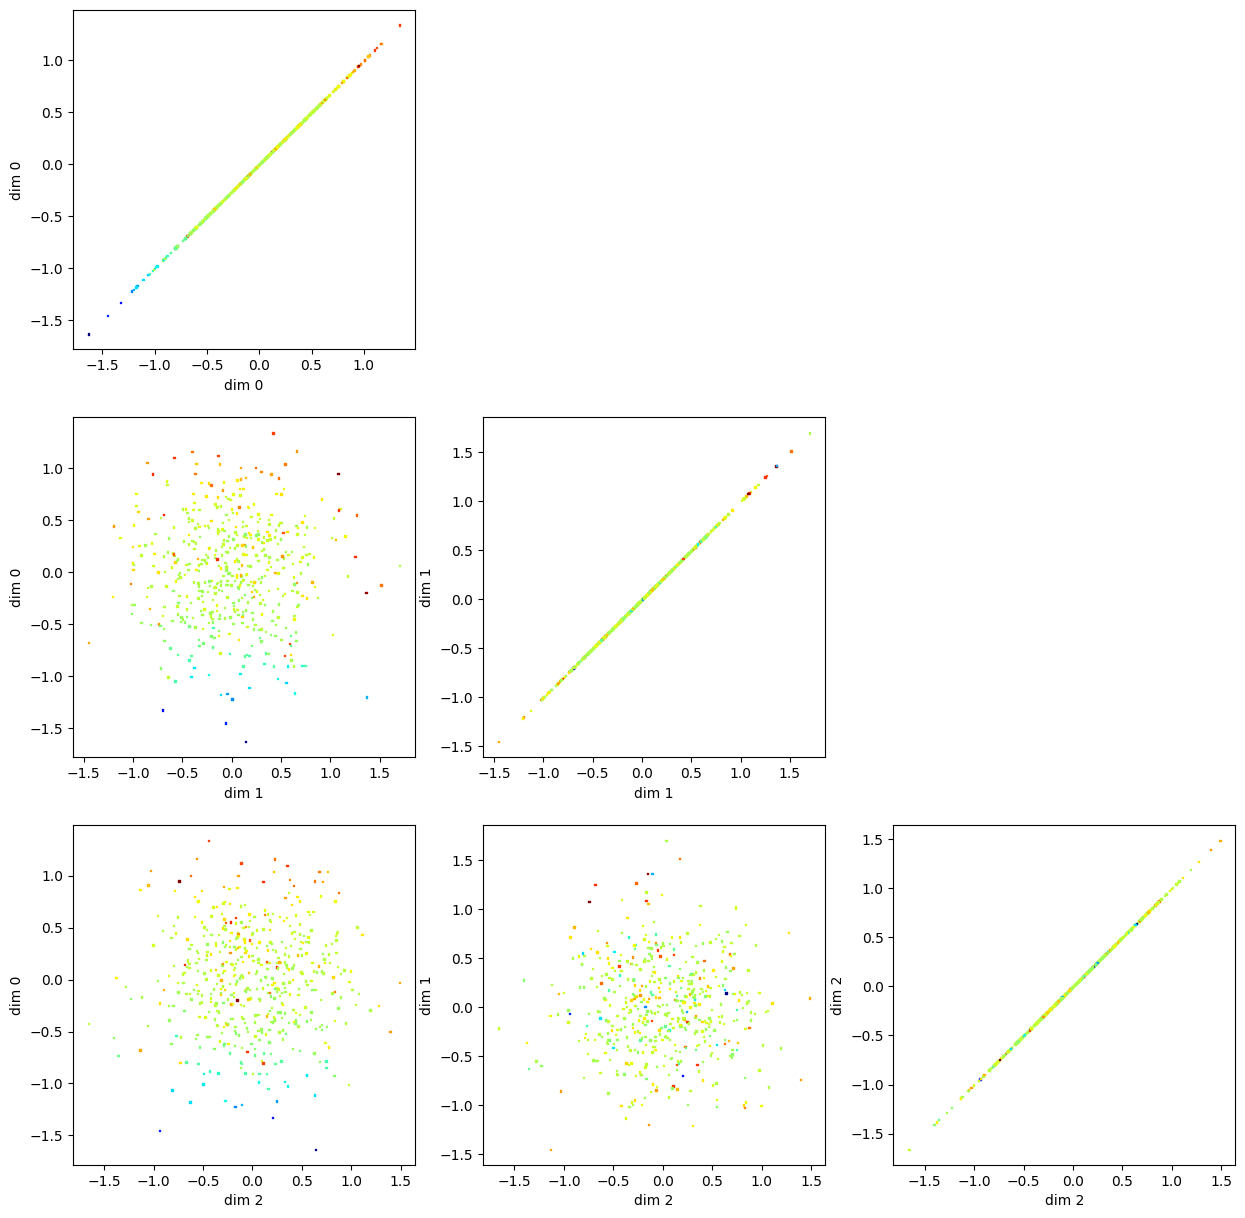

In [18]:
LIST_DIM_PAIR_PLOT = [0,1,2]

print_pairplot(Z.transpose(), LIST_DIM_PAIR_PLOT = LIST_DIM_PAIR_PLOT, 
                indice_color=attrib_pts)